<a href="https://colab.research.google.com/github/ArunabhaDeb2018/DeepLearning_CNN/blob/master/TF2_0_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
from tensorflow.keras.layers import MaxPool2D,Activation,BatchNormalization,Dropout,Input,Conv2D

In [ ]:
import numpy as np

In [ ]:
print(tf.test.gpu_device_name())

/device:GPU:0


In [ ]:
from tensorflow.keras.models import Model

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train[0].shape

(32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
X_train,X_test=X_train/255.0,X_test/255.0;

In [ ]:
i=Input(shape=X_train[0].shape)

In [ ]:
x=Conv2D(filters=32,kernel_size=(3,3),padding='same')(i)
x=BatchNormalization()(x)
x=Activation('relu')(x)

In [ ]:
x=Conv2D(filters=64,kernel_size=(3,3),padding='same')(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)

In [ ]:
x=Conv2D(filters=128,kernel_size=(3,3),padding='same')(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)

In [ ]:
x=MaxPool2D(strides=2,pool_size=(2,2),padding='valid')(x)

In [ ]:
x=Conv2D(filters=256,kernel_size=(3,3),padding='same')(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)

In [ ]:
x=MaxPool2D(strides=2,pool_size=(2,2),padding='valid')(x)

In [ ]:
x=Flatten()(x)

In [ ]:
x=Dense(1024,activation='relu')(x)

In [ ]:
x=Dropout(0.4)(x)

In [ ]:
x=Dense(128,activation='relu')(x)
x=Dropout(0.4)(x)

In [ ]:
x=Dense(len(set(y_test[:,0])),activation='softmax')(x)

In [ ]:
model=Model(inputs=i,outputs=x)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=20,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/20
1563/1563 [==============================] - 51s 33ms/step - loss: 2.4006 - accuracy: 0.1023 - val_loss: 2.2931 - val_accuracy: 0.1178
Epoch 2/20
1563/1563 [==============================] - 50s 32ms/step - loss: 2.1914 - accuracy: 0.1537 - val_loss: 1.9780 - val_accuracy: 0.2687
Epoch 3/20
1563/1563 [==============================] - 51s 32ms/step - loss: 1.8714 - accuracy: 0.2711 - val_loss: 1.5268 - val_accuracy: 0.4280
Epoch 4/20
1563/1563 [==============================] - 50s 32ms/step - loss: 1.3982 - accuracy: 0.4947 - val_loss: 1.1178 - val_accuracy: 0.6080
Epoch 5/20
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0568 - accuracy: 0.6326 - val_loss: 0.9122 - val_accuracy: 0.6814
Epoch 6/20
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8660 - accuracy: 0.7060 - val_loss: 0.7797 - val_accuracy: 0.7300
Epoch 7/20
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7296 - accuracy: 0.7537 - val_loss: 0.7471 -

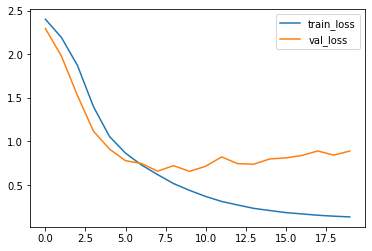

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['loss'],label='train_loss')
plt.plot(model.history.history['val_loss'],label='val_loss')
plt.legend()

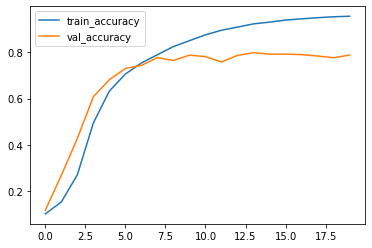

In [ ]:
plt.plot(model.history.history['accuracy'],label='train_accuracy')
plt.plot(model.history.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.8900 - accuracy: 0.7878


[0.8899510502815247, 0.7878000140190125]

In [ ]:
pred=model.predict(X_test)

In [ ]:
pred.shape

(10000, 10)

In [ ]:
print(pred[0])

[2.0475769e-08 7.4854928e-13 1.8331621e-08 9.9997497e-01 1.5819868e-10
 2.4471481e-05 5.2250346e-07 2.8005332e-11 1.2359432e-10 3.7520691e-11]


In [ ]:
tf.math.confusion_matrix(y_test,np.argmax(model.predict(X_test),axis=1),num_classes=len(set(y_test[:,0])))

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[830,  17,  33,  20,  13,   2,   7,  12,  37,  29],
       [ 11, 898,   0,   2,   2,   4,   2,   4,   7,  70],
       [ 62,   3, 684,  41,  82,  50,  38,  24,   9,   7],
       [ 23,   2,  70, 628,  42, 147,  49,  23,   4,  12],
       [ 21,   1,  65,  42, 754,  34,  30,  45,   5,   3],
       [  9,   2,  44, 151,  26, 716,  11,  31,   5,   5],
       [  6,   4,  45,  63,  40,  14, 816,   8,   2,   2],
       [  7,   2,  16,  33,  48,  42,   3, 836,   2,  11],
       [ 65,  29,  11,  17,   4,   5,   5,   2, 841,  21],
       [ 25,  52,   2,   9,   6,   4,   2,   8,  17, 875]], dtype=int32)>

In [ ]:
cifar10_labels=['Aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']



[1]


1


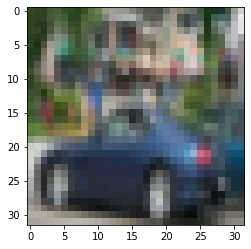

In [ ]:
plt.imshow(X_test[122])
print('\n')
print(y_test[122])
print('\n')
print(np.argmax(pred[122]))

In [ ]:
len(y_test[:,0])

10000

In [ ]:
idx=[]
for i in range (0,len(y_test[:,0])):
  if y_test[i] != np.argmax(pred[i]):
    idx.append(i);

In [ ]:
len(idx)

2122

In [ ]:
i=np.random.choice(idx)
print('True label')
print('\n')
print(cifar10_labels[np.squeeze(y_test[i])])
print('\n')
print('Predicted label')
print('\n')
print(cifar10_labels[np.argmax(pred[i])])

True label


cat


Predicted label


deer
